In [176]:
import tensorflow as tf
from tensorflow import keras # TensorFlow est un outil open source
                             #d'apprentissage automatique developpe par Google.

import numpy as np # bibliotheque nmpy permet d'effectuer des calculs numeriques avec Python.
                   # Elle introduit une gestion facilitee des tableaux de nombres.
from PIL import Image # pour traitement et convertion des images
from matplotlib import pyplot # pour afficher l'image sur un graphe
from os import listdir # il permet  de gérer l’arborescence des fichiers (boucler sur le fichie)

In [177]:
"""============================================
    Chargement de la base de données
============================================"""
X_train = np.zeros((460, 240, 320)) # une matrice qui a 460 matrice du taile 240 lignes*320 colones (les photos)
Y_train = np.zeros((460)) # une matrice de 460 lignes et 1 colonne, contient les resultats attendus

i = 0 #  un parametre pour boucler sur 460 images 

for k in range(1, 47): # 46 personnes
    folder_left = "C:/Users/abdou/Desktop/New folder/MMU/" + str(k) + "/left"
    folder_right = "C:/Users/abdou/Desktop/New folder/MMU/" + str(k) + "/right"

    for j in os.listdir(folder_left): # os.listdir liste les fichiers qui sont au sein du folder_left 
        if j.endswith('.bmp'): # tester c'est le fichier est un photo
            #ouvrir chaque image, convertir en blanc & noir,
            #puis la stoker dans la variable img
            img = np.array(Image.open(folder_left + '/' + j).convert(mode = 'L')) 
            X_train[i] = img
            Y_train[i] = k - 1
            i += 1

    #  maintenant pour les fichiers des yeux droite.
    for j in os.listdir(folder_right):
        if j.endswith('.bmp'):
            img = np.array(Image.open(folder_right + '/' + j).convert(mode = 'L'))
            X_train[i] = img
            Y_train[i] = k - 1
            i += 1


X_train = X_train.astype(int) # changer le type
Y_train = Y_train.astype(int)

Photo 459 dans X_train:


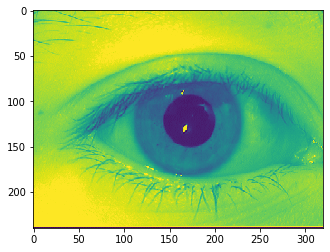

In [196]:
print("Photo 459 dans X_train:")
pyplot.imshow(X_train[459], interpolation="nearest")
# afficher la derniere image avec la fonction de pyplot:imshow
pyplot.show()

In [179]:
#--preprocess
#changer le type de X_train  en  float et les deviser sur 255.0
#changer le type de Y_train 

def preprocess(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64)
  return x, y

# ---create_dataset
# --one_hot-- convertir chaque l'element de vecteur Y_train en vecteur
# de 46 zero sauf le numero du personne qui sera remplacer par 1.
# et cree une dataset a partir de la bibliotheque tensorflow
# --shuffle-- melanger la place des personne (par exemple le deuxieme personne )
def create_dataset(xs, ys, n_classes=46):
  ys = tf.one_hot(ys, depth=n_classes)
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(128)

dataset = create_dataset(X_train, Y_train)


In [180]:
#cree un réseau de neurones de 4 cauches et chaqu'une de cette mots en question contient 256,192,128,46 neurones.
#la dimension des donnees d'entree sont : (240,)
model = keras.Sequential([
    keras.layers.Reshape(target_shape=(240 * 320,), input_shape=(240, 320)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=46, activation='sigmoid')
])

In [181]:
#definir les parametre l'optimisation et la fonction loss  du model  
model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# entrainement du model 
history = model.fit(
    dataset.repeat(), 
    epochs=10, 
    steps_per_epoch=100
)

Epoch 1/10
100/100 [==============================] - 12s 116ms/step - loss: 6.7812 - accuracy: 0.1046
Epoch 2/10
100/100 [==============================] - 12s 119ms/step - loss: 2.4596 - accuracy: 0.3539
Epoch 3/10
100/100 [==============================] - 12s 119ms/step - loss: 1.3815 - accuracy: 0.6331
Epoch 4/10
100/100 [==============================] - 12s 123ms/step - loss: 0.6698 - accuracy: 0.8370
Epoch 5/10
100/100 [==============================] - 12s 124ms/step - loss: 0.2863 - accuracy: 0.9447
Epoch 6/10
100/100 [==============================] - 13s 126ms/step - loss: 0.1548 - accuracy: 0.9680
Epoch 7/10
100/100 [==============================] - 13s 129ms/step - loss: 0.0922 - accuracy: 0.9768
Epoch 8/10
100/100 [==============================] - 13s 126ms/step - loss: 0.0664 - accuracy: 0.9770
Epoch 9/10
100/100 [==============================] - 13s 128ms/step - loss: 0.0639 - accuracy: 0.9765
Epoch 10/10
100/100 [==============================] - 13s 132ms/step - l

In [182]:
#changer le type de X_train en float et les deviser sur 255.0
#changer le type de Y_train
#pour les utiliser dans le model
X_train = tf.cast(X_train, tf.float32) / 255.0
Y_train = tf.cast(Y_train, tf.int64)

In [191]:
#faire des prediction sur X_train et les stocker dans predictions
predictions = model.predict(X_train)

In [193]:
# one_hot fonction deja expliqué
# np.argmax prend l'indice du max dans le vecteur
print("La resultat attendu: (personne 43)")
print(np.argmax(tf.one_hot(Y_train, depth=46)[435]))
print()
print("La resultat obtenu:")
# et on le compare par la resultat obtenu
print(np.argmax(predictions[435]))

La resultat attendu: (personne 43)
43

La resultat obtenu:
43


In [195]:
# model.evaluate : donne le pourcentage du precision et du loss
score = model.evaluate(X_train, tf.one_hot(Y_train, depth=46), verbose = 0)
# afficher les deux pourcentages
print('Test loss:', score[0]*100 , "%") 
print('Test accuracy:', score[1]*100 , "%")

Test loss: 4.885188490152359 %
Test accuracy: 97.826087474823 %
